In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

sns.set_style('whitegrid')

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [35]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

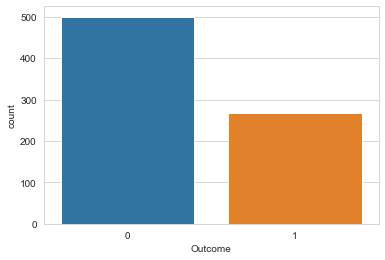

In [54]:
sns.countplot(data=diabetes, x='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

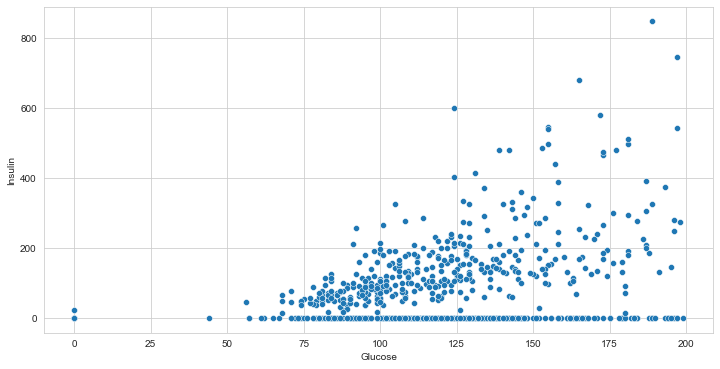

In [55]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=diabetes,x='Glucose', y='Insulin')

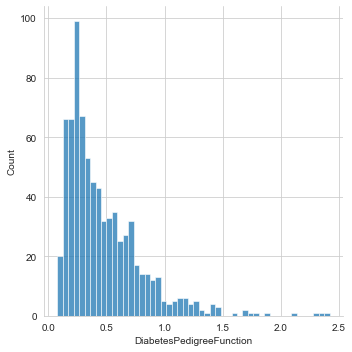

In [65]:
sns.displot(data=diabetes, x='DiabetesPedigreeFunction', bins=50)

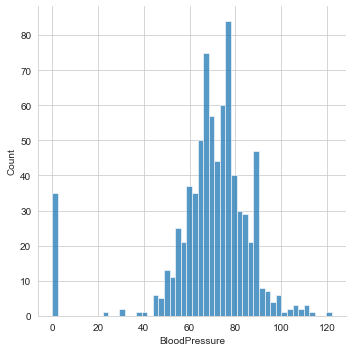

In [66]:
sns.displot(data=diabetes, x='BloodPressure', bins=50)

<AxesSubplot:xlabel='Age', ylabel='count'>

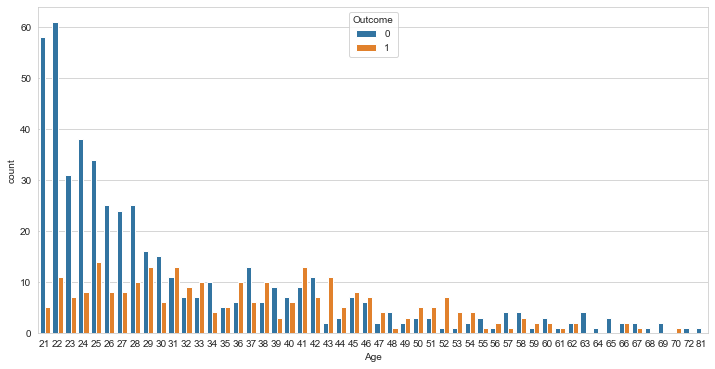

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=diabetes, hue='Outcome')

<AxesSubplot:>

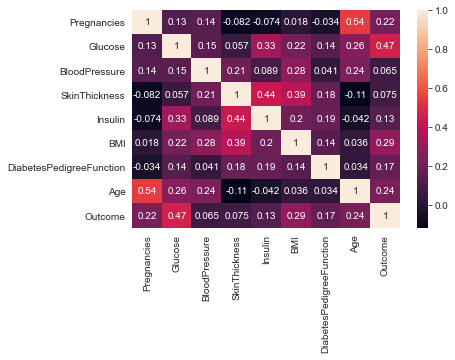

In [14]:
sns.heatmap(diabetes.corr(), annot=True)

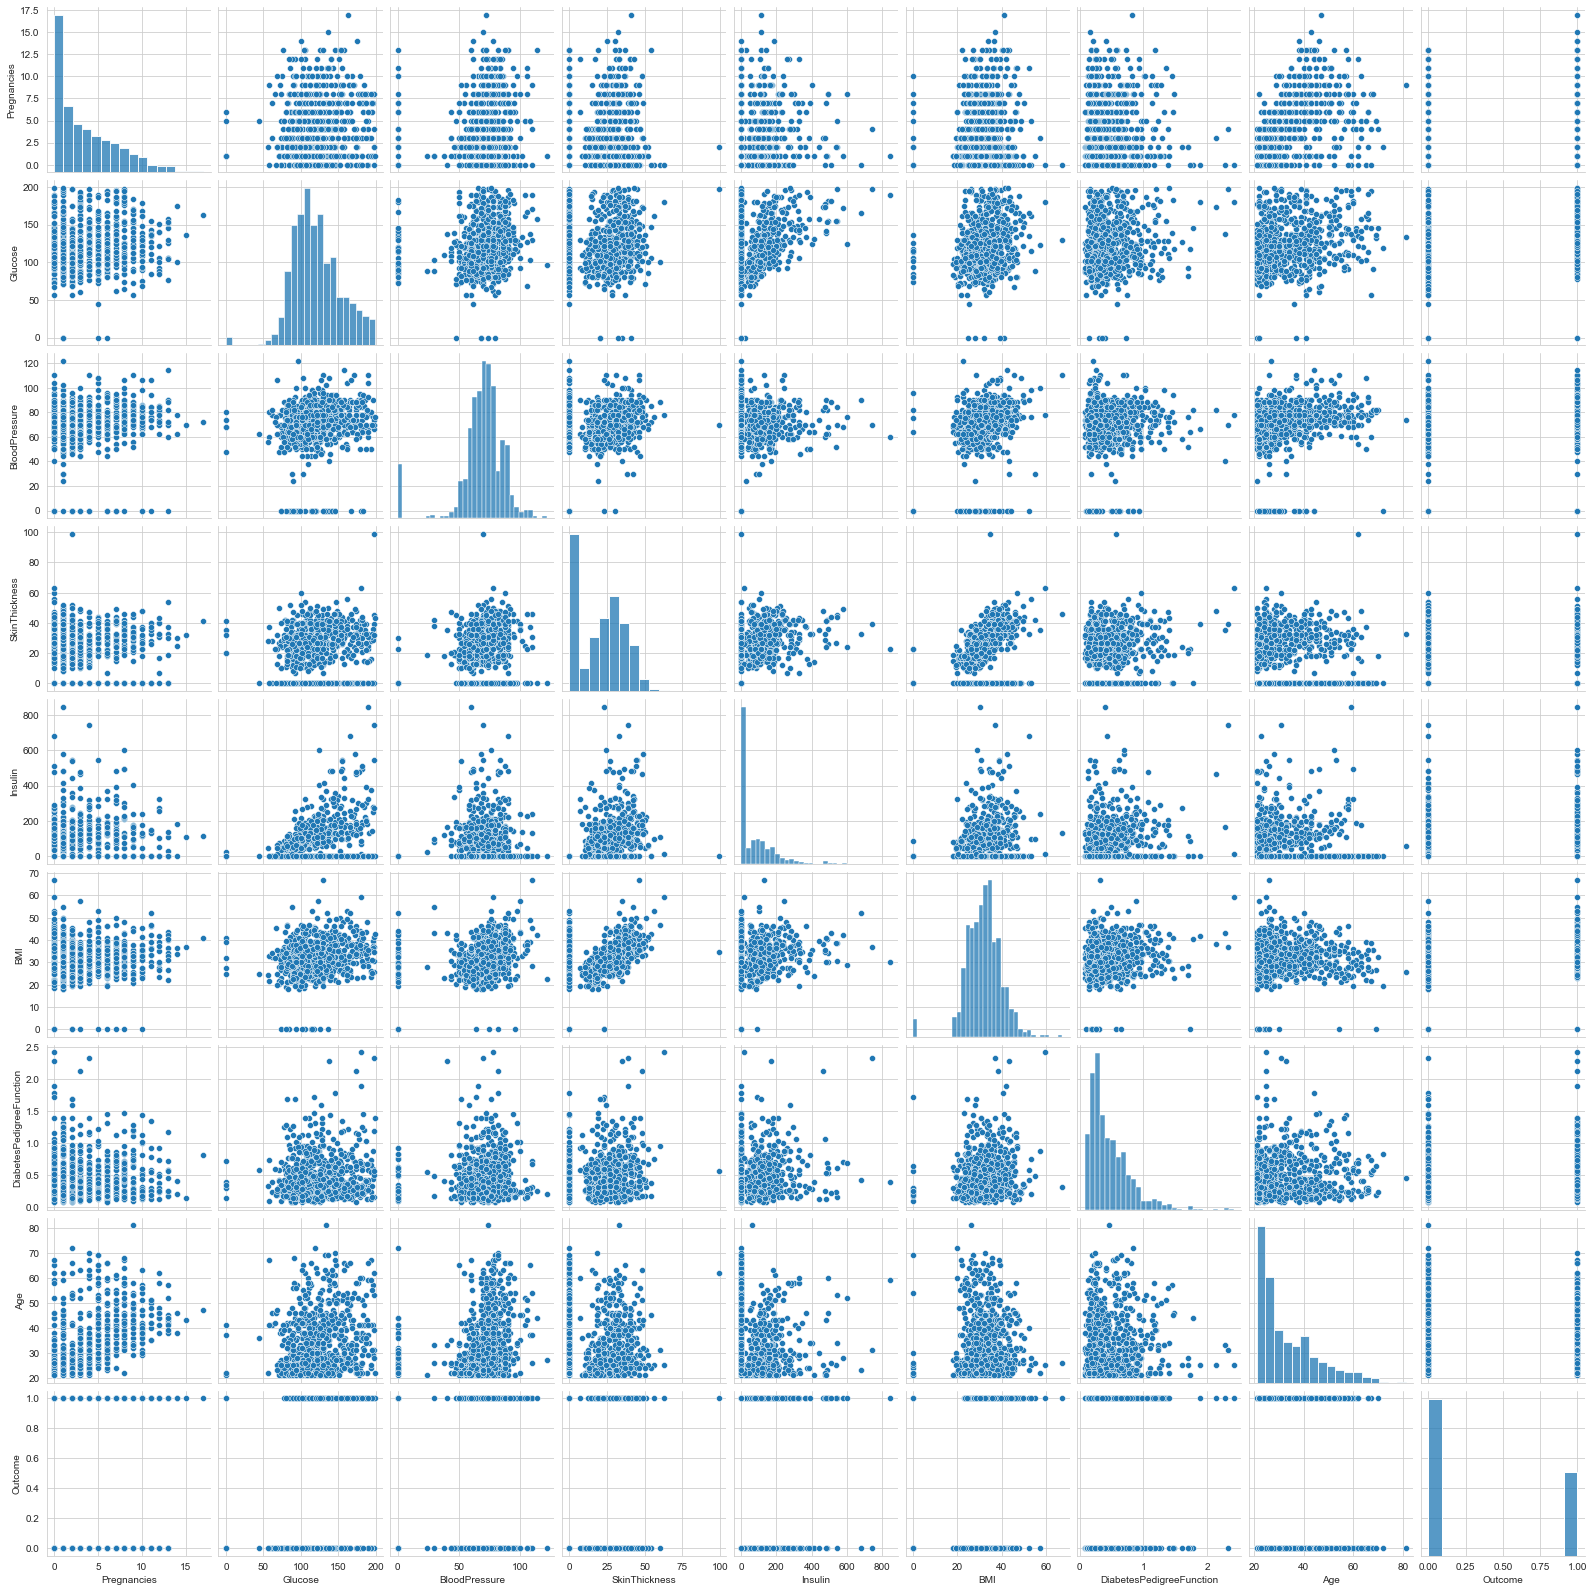

In [19]:
sns.pairplot(data=diabetes)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [86]:
x = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction' ,'Age']].values
y = diabetes[['Outcome']].values.reshape(-1,1)

In [87]:
X_resampled, y_resampled = SMOTE().fit_resample(x,y)

In [94]:
df = pd.DataFrame(data=X_resampled, columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction' ,'Age'])
df['Outcome'] = y_resampled

<AxesSubplot:xlabel='Outcome', ylabel='count'>

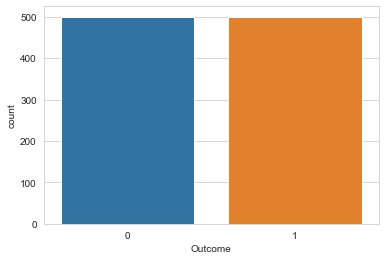

In [97]:
sns.countplot(data=df, x='Outcome')

In [104]:
X_train, X_test, y_train , y_test = train_test_split(X_resampled,y_resampled, test_size=0.3)

In [116]:
X_train.shape, y_train.shape

((700, 8), (700,))

In [105]:
scaler = MinMaxScaler(feature_range=(-1,1))
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.fit_transform(X_test.astype(np.float64))

In [106]:
lm = LogisticRegression()
lm.fit(X_train, y_train.ravel())

LogisticRegression()

In [107]:
y_pred = lm.predict(X_test)

In [108]:
print(confusion_matrix(y_test,y_pred))

[[122  28]
 [ 43 107]]


In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       150
           1       0.79      0.71      0.75       150

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



In [110]:
lm.coef_

array([[ 1.1102208 ,  3.22809484, -0.6550652 ,  0.03019607, -0.15864032,
         2.54687745,  1.00483627,  0.43474145]])

In [111]:
lm.intercept_

array([0.72820689])

In [118]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [125]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
22/22 [==============================] - 0s 952us/step - loss: 0.4615 - accuracy: 0.7771
Epoch 2/50
22/22 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7714
Epoch 3/50
22/22 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.7857
Epoch 4/50
22/22 [==============================] - 0s 771us/step - loss: 0.4606 - accuracy: 0.7571
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7757
Epoch 6/50
22/22 [==============================] - 0s 861us/step - loss: 0.4584 - accuracy: 0.7757
Epoch 7/50
22/22 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.7743
Epoch 8/50
22/22 [==============================] - 0s 907us/step - loss: 0.4559 - accuracy: 0.7729
Epoch 9/50
22/22 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7643
Epoch 10/50
22/22 [==============================] - 0s 816us/step - loss: 0.4554 - accuracy: 0.7800
Epoch 11/

In [126]:
y_pred_ = model.predict(X_test)

for i in range(len(y_pred_)):
    if y_pred_[i,0] > 0.5:
        y_pred_[i,0] = 1
    else:
        y_pred_[i,0] = 0

In [127]:
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       150
           1       0.78      0.70      0.74       150

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300

